In [1]:
cd ..

/home/noahb/fv3net


The fV3 data can be loaded with intake

# FV3 data

This is hosted on this machine

In [2]:
from metpy.interpolate import interpolate_1d

import xarray as xr
import matplotlib.pyplot as plt

data_2d = xr.open_zarr("/home/noahb/data/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute/2d.zarr/")
data_3d = xr.open_zarr("/home/noahb/data/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute/3d.zarr/")

In [6]:
def compute_sigma_on_pres(sigma_grid, pres_sigma_pa, pres_desired):
    pres_pa, sigma = xr.broadcast(pres_sigma_pa, sigma_grid)
    pres_mb = pres_pa/100
    return np.asarray(interpolate_1d(pres_desired.values, pres_mb.values, sigma.values, axis=1))

def compute_height_on_sigma(sigma_pres_mb, height_pres_mb, sigma_desired):
    return np.asarray(interpolate_1d(sigma_desired.values, sigma_pres_mb, height_pres_mb, axis=1))


In [7]:
data_3d

<xarray.Dataset>
Dimensions:       (bnds: 2, grid_xt: 1536, grid_yt: 768, pfull: 79, phalf: 80, plev: 31, time: 4)
Coordinates:
  * grid_xt       (grid_xt) float32 0.1171875 0.3515625 ... 359.64844 359.8828
  * grid_yt       (grid_yt) float32 -89.88281 -89.64844 ... 89.64844 89.88281
  * pfull         (pfull) float32 4.5137978 8.300872 ... 994.3374 998.2764
  * phalf         (phalf) float32 3.0 6.4671593 10.452223 ... 996.5372 1000.0
  * plev          (plev) float32 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1000.0
  * time          (time) object 2016-08-01 03:00:00 ... 2016-08-01 12:00:00
Dimensions without coordinates: bnds
Data variables:
    grid_xt_bnds  (grid_xt, bnds) float32 dask.array<shape=(1536, 2), chunksize=(1536, 2)>
    grid_yt_bnds  (grid_yt, bnds) float32 dask.array<shape=(768, 2), chunksize=(768, 2)>
    h_plev        (time, plev, grid_yt, grid_xt) float32 dask.array<shape=(4, 31, 768, 1536), chunksize=(4, 31, 768, 1536)>
    pres          (time, pfull, grid_yt, grid_xt) f

In [8]:
d = data_3d.isel(time=slice(0, 1), grid_xt=slice(0, 512)).compute()

In [9]:
sigma_press_mb = compute_sigma_on_pres(d.pfull, d.pres, d.plev)

/home/noahb/.conda/envs/fv3net/lib/python3.7/site-packages/metpy/interpolate/one_dimension.py:139: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')
/home/noahb/.conda/envs/fv3net/lib/python3.7/site-packages/metpy/interpolate/one_dimension.py:149: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


In [10]:
z_sigma = compute_height_on_sigma(sigma_press_mb, d.h_plev, d.pfull)

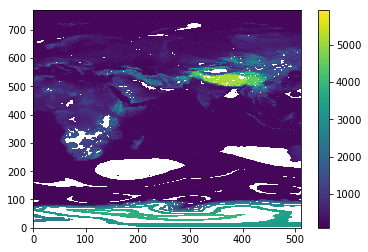

In [11]:
plt.pcolormesh(z_sigma[0,-5])
plt.colorbar()

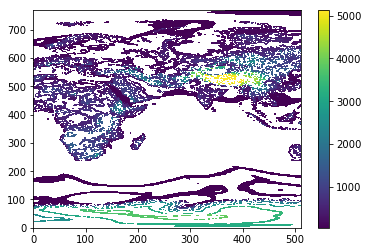

In [12]:
plt.pcolormesh(z_sigma[0,-2])
plt.colorbar()

Text(0, 0.5, 'sigma')

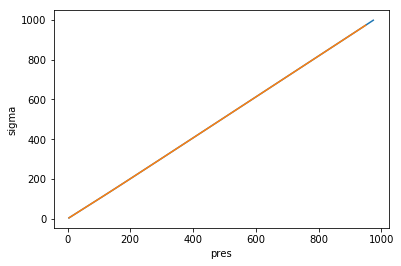

In [13]:
loc = (0, slice(None), 500, 0)

plt.plot(d.pres[loc]/100, d.pfull)
plt.plot(d.plev, sigma_press_mb[loc])
# plt.plot(d)
plt.xlabel('pres')
plt.ylabel('sigma')

These lines are on top of each other, so the interpolation worked.

Text(0, 0.5, 'z (m)')

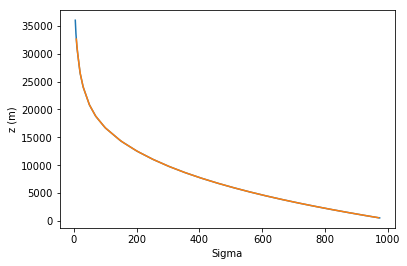

In [14]:
plt.plot(sigma_press_mb[loc], d.h_plev[loc])
plt.plot(d.pfull, z_sigma[loc])
plt.xlabel('Sigma')
plt.ylabel('z (m)')

Why are there NaNs in the interpolated heights?

In [15]:
z_sigma[loc]

array([        nan, 32617.691  , 30112.02   , 28130.637  , 26355.904  ,
       25240.535  , 24114.314  , 23363.52   , 22605.066  , 21786.39   ,
       20893.559  , 20251.508  , 19587.428  , 18871.74   , 18323.037  ,
       17766.596  , 17173.307  , 16597.133  , 16135.457  , 15647.921  ,
       15134.646  , 14595.816  , 14106.042  , 13667.741  , 13211.3545 ,
       12737.338  , 12295.6455 , 11880.204  , 11451.753  , 11014.334  ,
       10626.394  , 10228.849  ,  9822.282  ,  9452.861  ,  9084.516  ,
        8709.921  ,  8366.073  ,  8024.587  ,  7679.041  ,  7361.176  ,
        7041.919  ,  6724.4907 ,  6427.947  ,  6130.072  ,  5840.363  ,
        5563.826  ,  5287.106  ,  5023.4385 ,  4766.789  ,  4510.8545 ,
        4271.022  ,  4033.7336 ,  3799.8108 ,  3579.4448 ,  3360.9011 ,
        3148.3066 ,  2946.4514 ,  2747.5725 ,  2555.913  ,  2374.0713 ,
        2196.337  ,  2025.2787 ,  1864.6221 ,  1709.1288 ,  1559.0735 ,
        1420.174  ,  1288.1001 ,  1162.2676 ,  1043.117  ,   934

What is the pressure at these sigma levels?

In [16]:
d.pres[loc].values/100

array([  4.5130954,   8.300017 ,  12.450255 ,  16.74186  ,  21.042091 ,
        25.336323 ,  29.6726   ,  34.14457  ,  38.86634  ,  43.963116 ,
        49.521446 ,  55.55887  ,  62.090206 ,  69.12901  ,  76.687    ,
        84.7731   ,  93.394806 , 102.55699  , 112.249435 , 122.44874  ,
       133.14375  , 144.33379  , 156.01627  , 168.18555  , 180.83282  ,
       193.94809  , 207.51938  , 221.53227  , 235.96991  , 250.81593  ,
       266.04968  , 281.64902  , 297.59705  , 313.8663   , 330.43292  ,
       347.2762   , 364.3795   , 381.70773  , 399.2355   , 416.9425   ,
       434.803    , 452.79175  , 470.88297  , 489.05707  , 507.2828   ,
       525.5443   , 543.818    , 562.0786   , 580.3078   , 598.49054  ,
       616.59607  , 634.61804  , 652.5375   , 670.33185  , 687.97986  ,
       705.44635  , 722.69476  , 739.6844   , 756.3798   , 772.7473   ,
       788.73126  , 804.31506  , 819.4533   , 834.1132   , 848.2444   ,
       861.823    , 874.8242   , 887.1907   , 898.9051   , 909.9

The pressures of the re-gridded data are 

In [17]:
d.plev

<xarray.DataArray 'plev' (plev: 31)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,  500.,  550.,
        600.,  650.,  700.,  750.,  800.,  850.,  900.,  925.,  950.,  975.,
       1000.], dtype=float32)
Coordinates:
  * plev     (plev) float32 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1000.0
Attributes:
    cartesian_axis:  Z
    long_name:       actual pressure level
    positive:        down
    units:           mb

Therefore, some of these sigma coordinates lie outside of this range. I think we should use constant extrapolation for this.

In [18]:
d.plev.values.swapaxes

<function ndarray.swapaxes>

In [19]:
def fill_na_nearest(x, axis=1):
    x.swapdims
    nz = x.shape[axis]
    for i in range(nz):
        x[]

SyntaxError: invalid syntax (<ipython-input-19-613d7062095f>, line 5)